# Laboratorio 4 - Regresión y Clustering

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 3 - Bodega de Vino

In [1]:
%config IPCompleter.greedy=True
%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
#Matplotlib
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#Centramos las imágenes
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Carga y Visualización de Datos

In [3]:
#Importamos el CSV
dataset = pd.read_csv('vinos.csv')
#Guardamos una copia del dataset original
datasetOriginal = dataset
#Mostramos los datos
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Limpieza de Datos

In [4]:
#Datos nulos
nulos = pd.DataFrame(dataset.isna().sum(), columns=["Número de nulos"])
nulos

,Número de nulos
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


No hay datos nulos por lo que podemos continuar sin problemas a la comprobación de "missing values"

In [5]:
#Datos missing
missing = pd.DataFrame(dataset.isnull().sum(), columns=["Número de missing values"])
missing

,Número de missing values
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


No hay 'missing values' por lo que podemos continuar sin problemas al siguiente paso, comprobar repetidos

In [6]:
tamOrig = dataset.shape
print('Tamaño del dataset sin eliminar datos duplicados: ', tamOrig)
dataset = dataset.drop_duplicates()
nuevoTam = dataset.shape
print('Eliminando los duplicados, el dataset queda del tamaño: ', nuevoTam)
if tamOrig == nuevoTam:
    print('No hay datos duplicados')
else:
    print('Se han eliminado,', tamOrig[0] - nuevoTam[0],'datos duplicados')

Tamaño del dataset sin eliminar datos duplicados:  (178, 13)
Eliminando los duplicados, el dataset queda del tamaño:  (178, 13)
No hay datos duplicados


Ya hemos terminado el apartado de la limpieza de los datos, pasamos a preprocesarlos

### Preprocesamiento de Datos

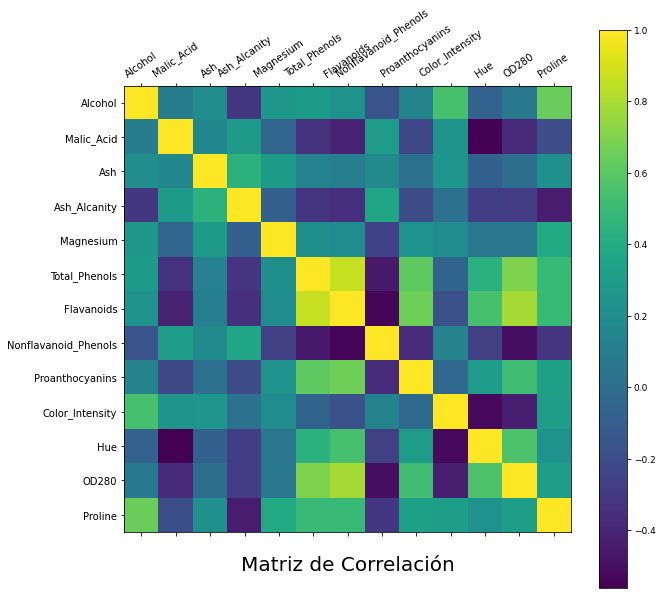

In [7]:
matrizC = plt.figure(figsize=(10, 10))

plt.matshow(dataset.corr(), fignum = matrizC.number)
plt.title('Matriz de Correlación', size='20', y=-0.1)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=10, rotation=35)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=10)

leyenda = plt.colorbar()
leyenda.ax.tick_params(labelsize=9)

Para conocer mejor los datos propuestos y como se relacionan entre ellos sacamos la matriz de correlación, donde podemos observar la fuerte correlación que hay entre los "Flavanoids" y los "Total_Phenols", así como "Proline" con el "Alcohol", a diferencia de la nula correlación que presentan los "Nonflavanoid_Phenols con los "Flavanoids" como "Hue" con "Color Intensity". En conclusión, esta matriz nos cuenta la relación que tienen unos compuestos químicos con otros respecto a la fabricación del vino, lo cual puede sernos de mucha ayuda para nuestro objetivo en la diferenciación de los vinos de la bodega.

In [8]:
datosTransformados = StandardScaler().fit_transform(dataset)
datosTransformados = pd.DataFrame(datosTransformados)
datosTransformados

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [9]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_,model.distances_,counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Los dendogramas nos ayudan en la elección más óptima de la K del modelo, ya que muestran las distintas agrupaciones en función de la distancia entre cada nodo. Por ello, es interesante analizar los distintos dendogramas con diferentes distancias, para finalmente elegir el modelo más óptimo y poder estudiarlo correctamente.

### 1) Utiliza varias configuraciones para el modelo aplicando “single linkage” que más se adapte y teniendo en cuenta los tipos de distancias entre elementos. ¿Cuál es la k del modelo? (1,5 puntos)

Como se nos pide que utilicemos 'single linkage' vamos a quedarnos con la configuración de este dendograma.

Para Single, podemos utilizar las siguientes distancias - “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed” -- La única excepcion es que si aplicamos Precomputed, necesitamos una matriz de distancias entre los elementos

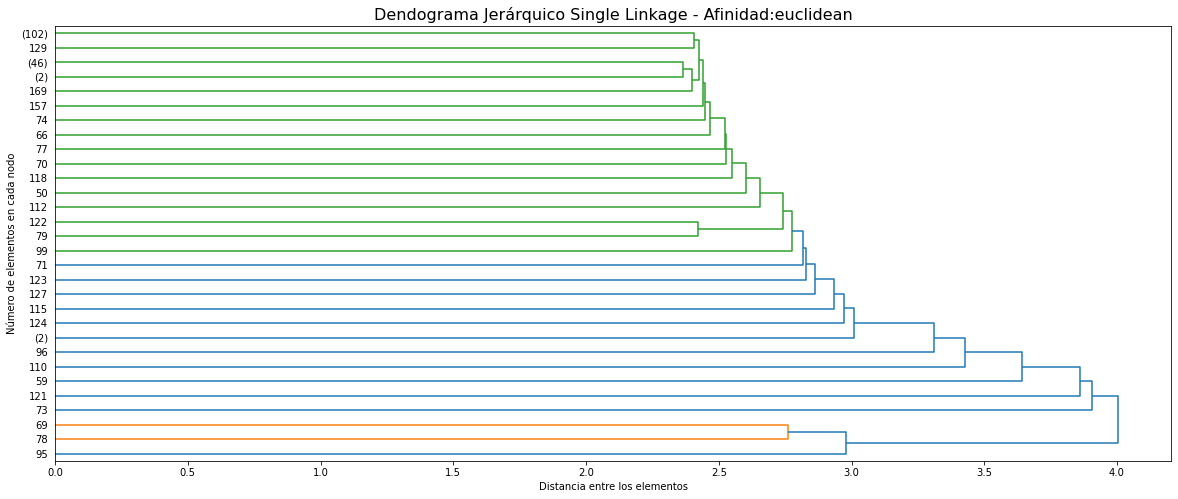

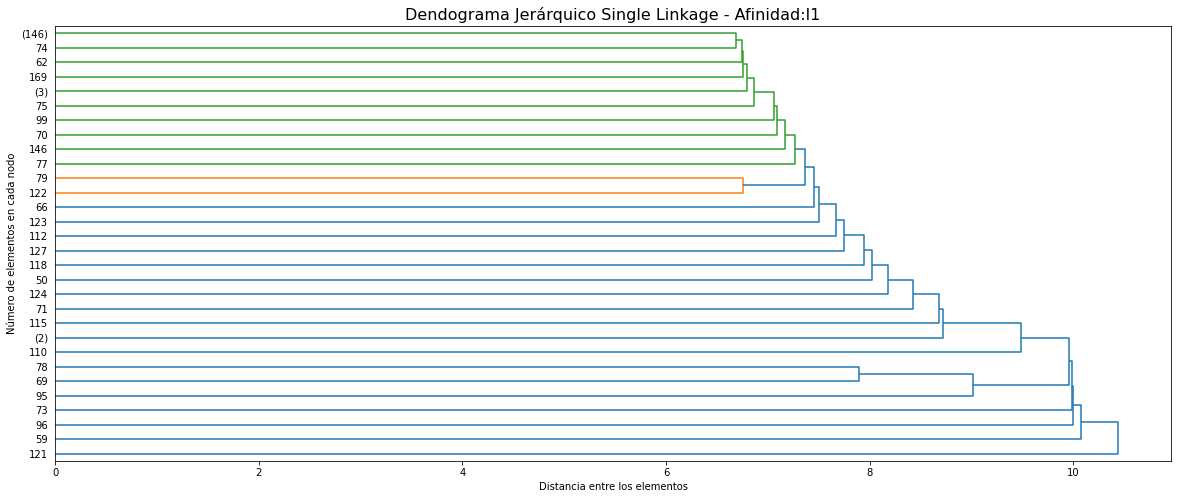

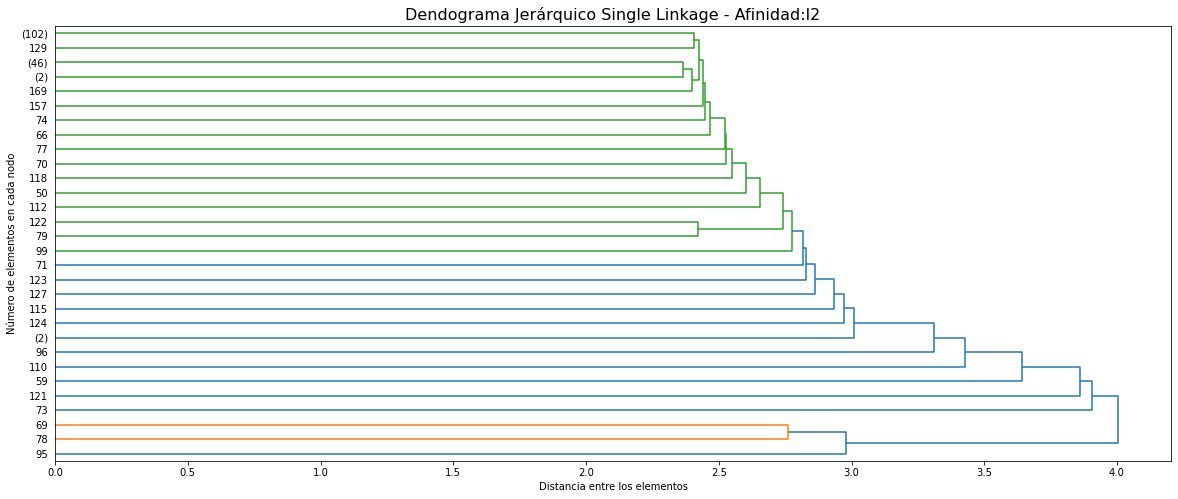

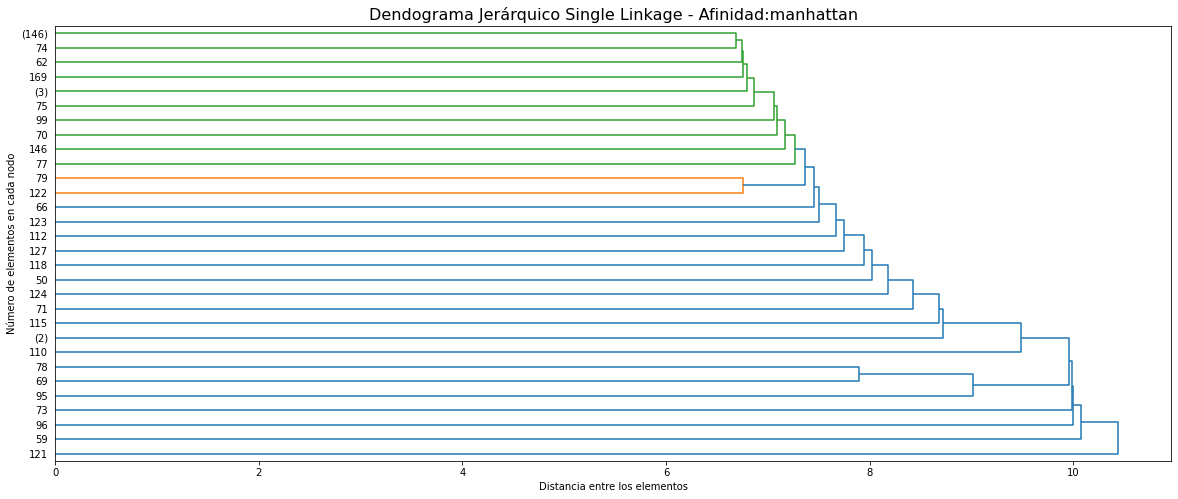

Calculando Matriz de Distancias...


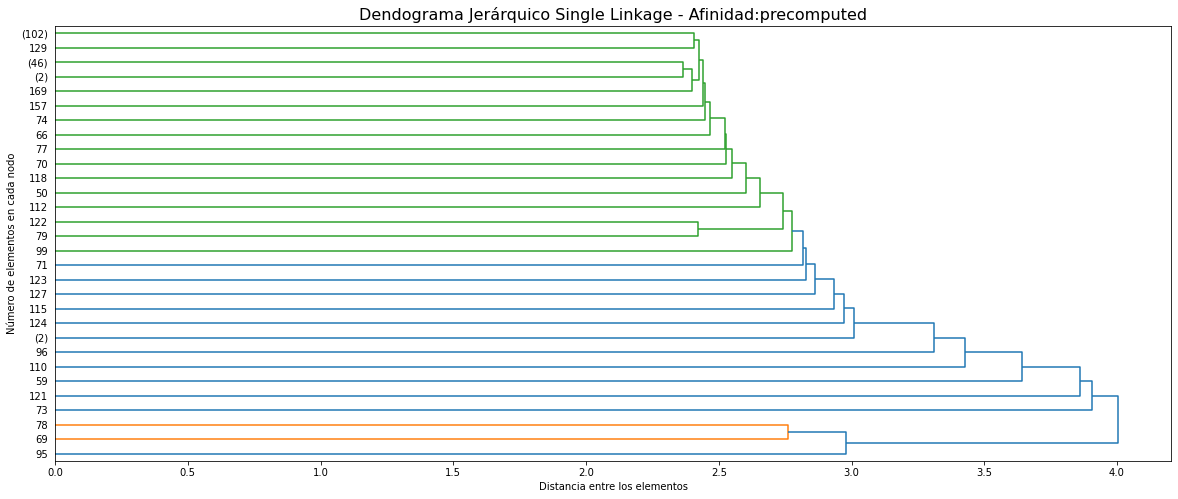

In [10]:
X = datosTransformados

afinidades = ['euclidean','l1','l2','manhattan','precomputed']
i = 0;
j = 0;
for afinidad in afinidades:
    if afinidad == 'precomputed':
        #Calculamos matriz de distancias
        from scipy.spatial import distance_matrix
        print('Calculando Matriz de Distancias...')
        X = pd.DataFrame(distance_matrix(datosTransformados.values, datosTransformados.values),
                         index=datosTransformados.index, columns=datosTransformados.index)
    model = AgglomerativeClustering(affinity=afinidad, distance_threshold=0, n_clusters=None, linkage='single')
    model = model.fit(X)
    plt.figure(figsize=(20, 8))
    plt.title('Dendograma Jerárquico Single Linkage - Afinidad:'+afinidad, size='16')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='lastp', count_sort='ascending', orientation='right')
    plt.ylabel("Número de elementos en cada nodo",size='10')
    plt.xlabel("Distancia entre los elementos",size='10')
    plt.show()

A continuación se muestra otro dendograma realizado con Scipy en vez de Scikit, queríamos hacer una comprobación sobre el resultado y confirmar que no afecta la orientación ni la librería a la hora de mostrar los resultados. Una vez comprobado, procedemos a elegir en base a los dendogramas mostrados anteriormente el que se ajusta más a nuestras necesidades y hace una diferenciación más clara de Cluster.

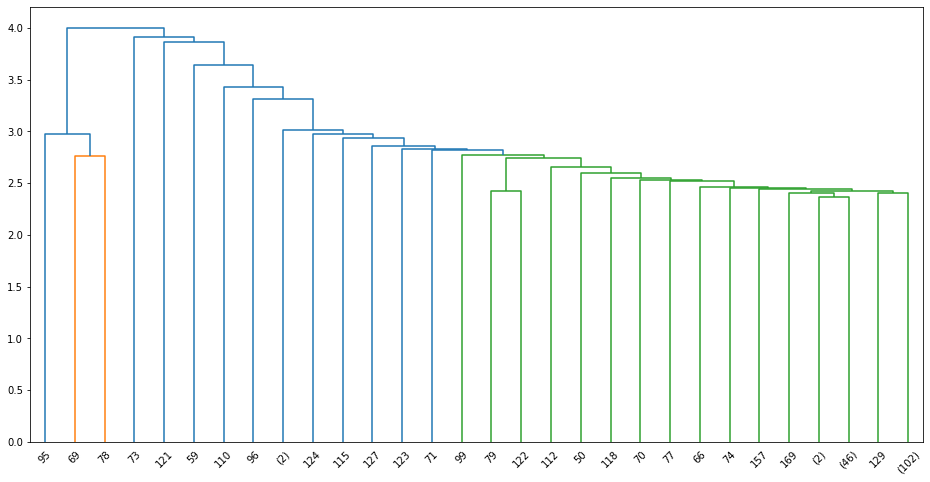

In [11]:
y = pdist(datosTransformados)
Z = centroid(y)
T = hierarchy.linkage(y, 'single')
plt.figure(figsize=(16, 8))
dn = hierarchy.dendrogram(T, truncate_mode='lastp',count_sort='ascending')

### 2) Dibuja un dendograma con los clústeres obtenidos. Explica alguna de las relaciones interesantes que puedes encontrar. ¿Se pueden identificar claramente varios tipos de vinos? ¿qué características los definirían? (1 punto)

Tras observar y estudiar los distintos dendogramas generados con las diferentes distancias, observamos que prácticamente todos son muy parecidos a excepción de los dendograma generados con la distancia Manhattan y l1, que son ligeramente más engorrosos en las agrupaciones finales, ya que apenas hay distancia entre las penútlimas y antepenúltimas agrupaciónes. 

Es por ello, que hemos escogido finalmente la afinidad Euclidea.

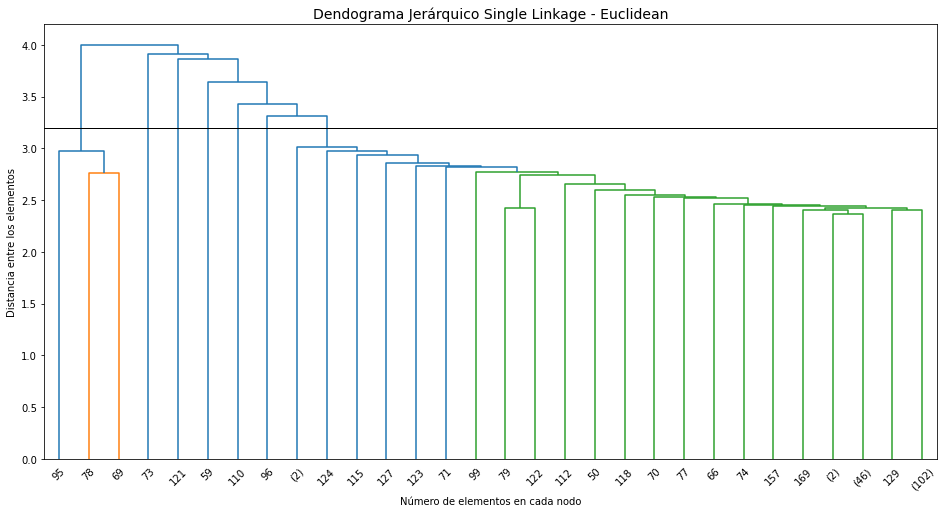

In [12]:
model = AgglomerativeClustering(affinity='euclidean', distance_threshold=0, n_clusters=None, linkage='single')
model = model.fit(datosTransformados)
plt.figure(figsize=(16, 8))
plt.title('Dendograma Jerárquico Single Linkage - Euclidean', size='14')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='lastp',count_sort='ascending')
plt.xlabel("Número de elementos en cada nodo")
plt.ylabel('Distancia entre los elementos')
plt.plot([0,300], [3.2,3.2], color='black', linewidth=1)
plt.show()

De nuevo generamos el dendograma de afinidad Euclidea y en este caso le incluimos la línea de corte que nos servirá para confirmar el número óptimo de de agrupaciones. En este dendograma podemos ver, que inicialmente se dan tres grupos, diferenciados por azul, naranja y verde. Pero al realizar el corte se reduce a dos únicas agrupaciones que se muestran a continuación.

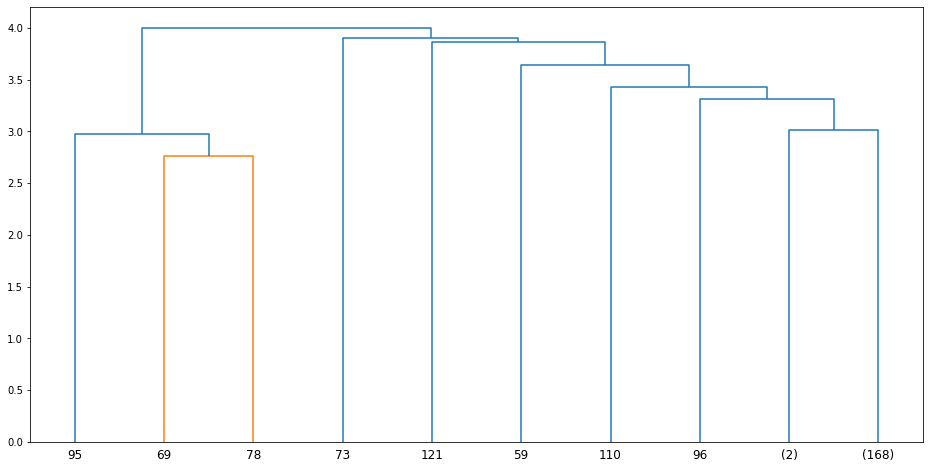

In [13]:
y = pdist(datosTransformados)
Z = centroid(y)
T = hierarchy.linkage(y, 'single')
plt.figure(figsize=(16, 8))
dn = hierarchy.dendrogram(T, truncate_mode='level', p=6, count_sort='ascending')

El dendograma final es una visualización compacta que nos permite la interpretación de la estructura de forma más fácil. Podemos ver que hay un par que se muestran bastante cerca, que son el (2) y el (168) , mientras que el los demás quedan separados de esta agrupación inicial pero adjuntandose a medida que la distancia aumenta, pero la distancia ha de aumentar casi un punto para que se agrupen todos estos valores, que por lo pronto parecen atípicos. 

Respecto a los datos que corresponden al grupo de la izquierda, también podemos ver que se da una agrupación inicial que corresponde con el color naranja y que de nuevo a medida que aumenta la distancia, aunque no excesivamente, se agrupan.

### Conclusiones

#### Una vez realizado los dendogramas y elegido uno como modelo, hemos estudiado los resultados obtenidos y los diversos valores atípicos que se han dado. Los valores que quedan entre parentesis representan el número de elementos que que contiene esa "pata", al contrario de lo que ocurre con los valores que quedan sin parentesis que representan un único elemento, que corresponde a la posición en el dataset.
#### Inicialmente se podían diferenciar tres vinos, que corresponden a los 3 colores representados en los primeros dendogramas pero con numerosos casos atípicos. A medida que ibamos aumentando la distancia esto se reducía a dos únicos tipos. Este alto número de casos atípicos puede ser provocado por el tipo de uva escogido para cada vino y que no todas las cosechas son igual de buenas, depende fundamentalmente del tipo de año que ha sido, respecto a las lluvias, granizos o sequías, la acídez de la tierra, posibles plagas, así como la maduración de la uva.